In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
user_id=pd.read_csv("ratings.csv")

In [7]:
user_id.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
movie=pd.read_csv("movies.csv")
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [52]:
df_movies=pd.merge(user_id,movie,on="movieId")
df_movies=df_movies.drop_duplicates()

# EDA


**Visualization Imports**

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns


In [54]:
df_movies.groupby("title")["rating"].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [55]:
df_movies.groupby("title")["rating"].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [56]:
ratings=df_movies.groupby("title")["rating"].mean().to_frame()
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [57]:
ratings["num_of_ratings"]=df_movies.groupby("title")["rating"].count()
ratings

,rating,num_of_ratings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
...,...,...
eXistenZ (1999),3.863636,22
xXx (2002),2.770833,24
xXx: State of the Union (2005),2.000000,5


<AxesSubplot:>

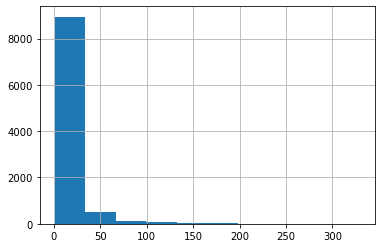

In [58]:
ratings["num_of_ratings"].hist()

<AxesSubplot:>

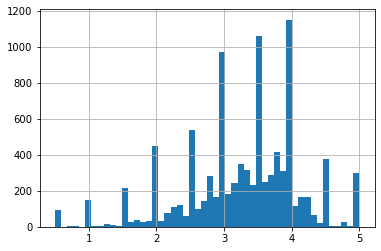

In [59]:
ratings["rating"].hist(bins=50)

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


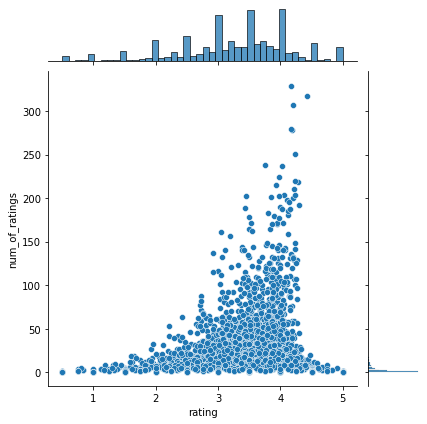

In [60]:
sns.jointplot(ratings["rating"],ratings["num_of_ratings"])

**Recommending Similar Movies**

In [101]:
movie_mat=df_movies.pivot_table(index="userId",columns="title",values="rating")
movie_mat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
ratings.sort_values("num_of_ratings",ascending=False).head(10)

,rating,num_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [105]:
forest_user_rating=movie_mat["Forrest Gump (1994)"]

In [127]:
similar_to_forrest_gump=movie_mat.corrwith(forest_user_rating)

C:\Users\nikhi\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\nikhi\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [130]:

similar_to_forrest_gump=pd.DataFrame(similar_to_forrest_gump,columns=["correlation"])
similar_to_forrest_gump.dropna(inplace=True)

In [133]:

similar_to_forrest_gump.sort_values(by="correlation" ,ascending=False).head()

,correlation
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0


In [135]:
similar_to_forrest_gump=similar_to_forrest_gump.join(ratings["num_of_ratings"])

In [140]:
similar_to_forrest_gump[similar_to_forrest_gump["num_of_ratings"]>100].sort_values(by="correlation",ascending=False)

,correlation,num_of_ratings
title,,
Forrest Gump (1994),1.000000,329
Good Will Hunting (1997),0.484042,141
Aladdin (1992),0.464268,183
American History X (1998),0.457287,129
"Truman Show, The (1998)",0.432556,125
...,...,...
Kill Bill: Vol. 1 (2003),-0.009399,131
"Lord of the Rings: The Return of the King, The (2003)",-0.016837,185
Blade Runner (1982),-0.017542,124
